In [1]:
import pandas as pd

# Load the customer churn dataset
file_path = r"C:\Users\suvee\Documents\Intellipat\Deep Learning Assignments\Assignments\Customer Churn\customer_churn.csv"
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Convert TotalCharges to numeric (coerce errors to handle missing values if any)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Data Manipulation tasks
# a. Find the total number of male customers
total_male_customers = data[data['gender'] == 'Male'].shape[0]

# b. Find the total number of customers whose Internet Service is ‘DSL’
total_dsl_customers = data[data['InternetService'] == 'DSL'].shape[0]

# c. Extract all the Female senior citizens whose Payment Method is Mailed check
new_customer_female_senior = data[(data['gender'] == 'Female') &
                                  (data['SeniorCitizen'] == 1) &
                                  (data['PaymentMethod'] == 'Mailed check')]

# Save to CSV
new_customer_female_senior.to_csv('female_senior_citizens_mailed_check.csv', index=False)

# d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than $500
new_customer_tenure_or_charges = data[(data['tenure'] < 10) | (data['TotalCharges'] < 500)]

# Save to CSV
new_customer_tenure_or_charges.to_csv('customers_tenure_or_charges.csv', index=False)

# Print results
print("Total Male Customers:", total_male_customers)
print("Total DSL Customers:", total_dsl_customers)
print("New Customer (Female Senior Citizens with Mailed Check):", new_customer_female_senior.shape[0])
print("New Customer (Tenure < 10 months or Total Charges < $500):", new_customer_tenure_or_charges.shape[0])

Total Male Customers: 3555
Total DSL Customers: 2421
New Customer (Female Senior Citizens with Mailed Check): 50
New Customer (Tenure < 10 months or Total Charges < $500): 2233


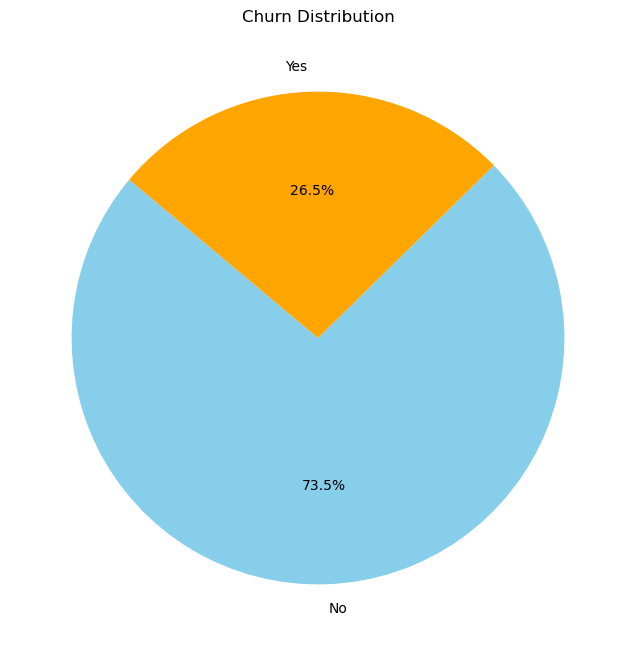

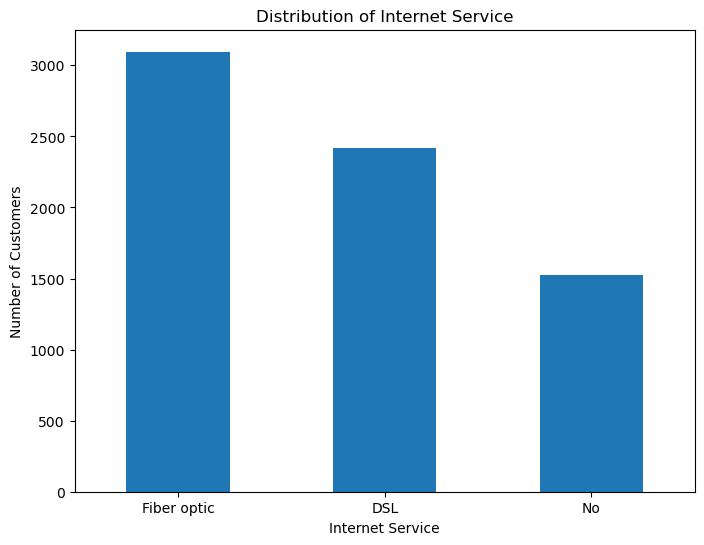

In [7]:
import matplotlib.pyplot as plt

# a. Pie-chart to show the distribution of customers churning out
churn_distribution = data['Churn'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(churn_distribution, labels=churn_distribution.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title("Churn Distribution")
plt.show()

# b. Bar-plot to show the distribution of ‘Internet Service’
internet_service_distribution = data['InternetService'].value_counts()
plt.figure(figsize=(8, 6))
internet_service_distribution.plot(kind='bar', rot=0)
plt.title("Distribution of Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Number of Customers")
plt.show()

C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


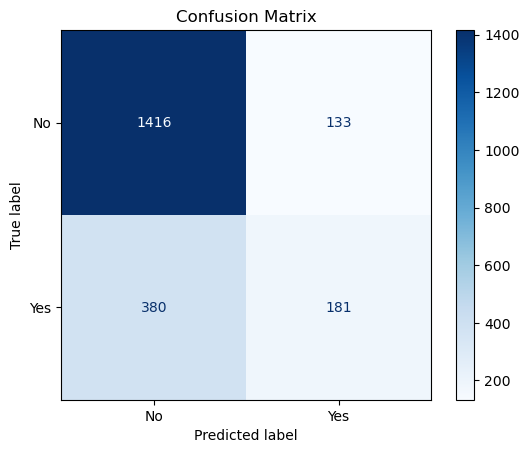

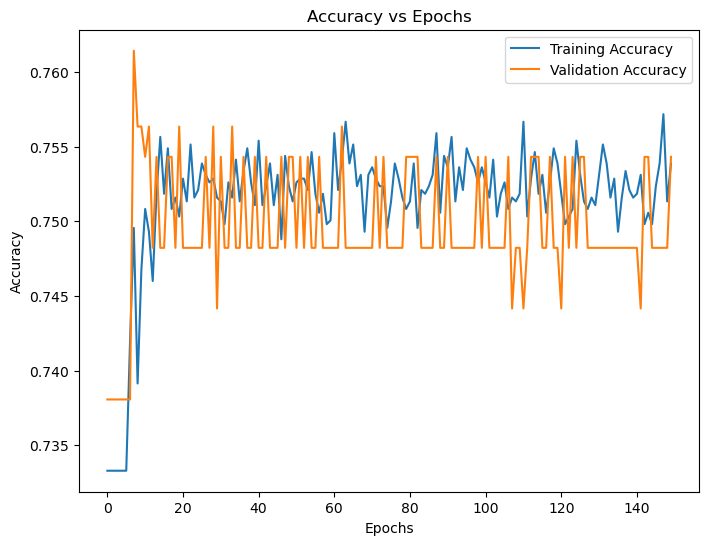

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Prepare data for the model
data = data.dropna(subset=['TotalCharges'])  # Drop rows with missing TotalCharges
X = data[['tenure']].values  # Feature: tenure
y = data['Churn']  # Target: Churn

# Encode target variable (Yes/No -> 1/0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the sequential model
model = Sequential([
    Dense(12, input_dim=1, activation='relu'),  # Input layer
    Dense(8, activation='relu'),               # Hidden layer
    Dense(1, activation='sigmoid')             # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=150, verbose=0, validation_split=0.2)

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Build a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot Accuracy vs Epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


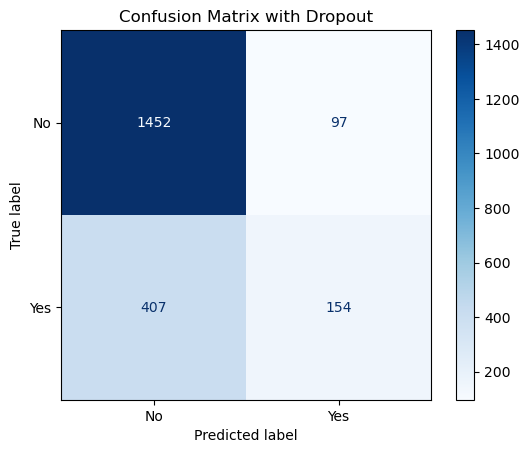

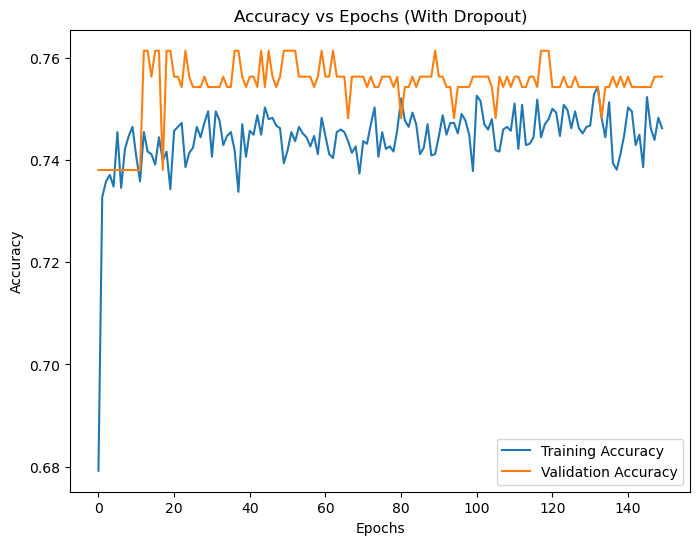

In [11]:
from tensorflow.keras.layers import Dropout

# Build the second sequential model with dropout layers
model_with_dropout = Sequential([
    Dense(12, input_dim=1, activation='relu'),  # Input layer
    Dropout(0.3),                              # Dropout after input layer
    Dense(8, activation='relu'),               # Hidden layer
    Dropout(0.2),                              # Dropout after hidden layer
    Dense(1, activation='sigmoid')             # Output layer
])

# Compile the model
model_with_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=150, verbose=0, validation_split=0.2)

# Predict on the test set
y_pred_with_dropout = (model_with_dropout.predict(X_test) > 0.5).astype(int)

# Build a confusion matrix
conf_matrix_with_dropout = confusion_matrix(y_test, y_pred_with_dropout)
disp_with_dropout = ConfusionMatrixDisplay(conf_matrix_with_dropout, display_labels=label_encoder.classes_)
disp_with_dropout.plot(cmap='Blues')
plt.title("Confusion Matrix with Dropout")
plt.show()

# Plot Accuracy vs Epochs
plt.figure(figsize=(8, 6))
plt.plot(history_with_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs (With Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


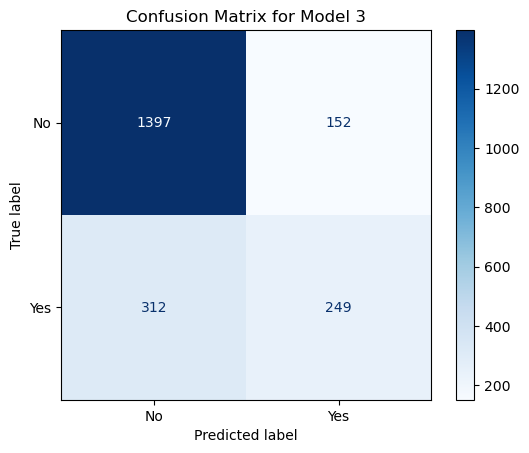

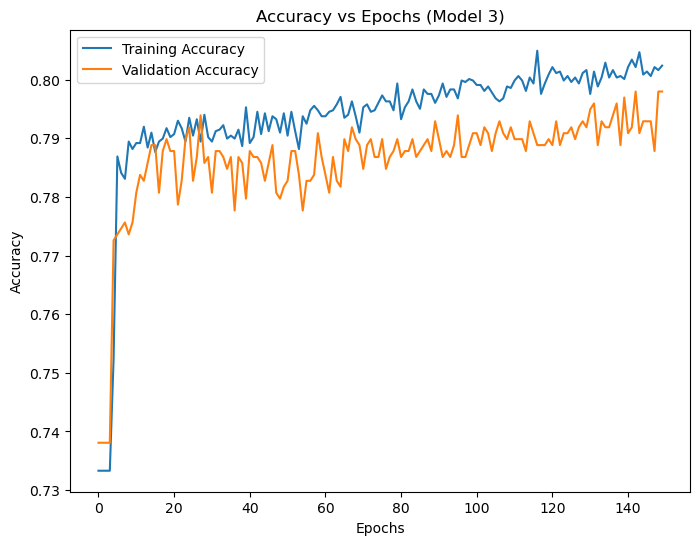

In [13]:
# Prepare data for the third model
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data = data.dropna(subset=features)  # Drop rows with missing values in feature columns

X = data[features].values  # Features: tenure, MonthlyCharges, TotalCharges
y = label_encoder.transform(data['Churn'])  # Target: Churn (already encoded)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the third sequential model
model_3 = Sequential([
    Dense(12, input_dim=3, activation='relu'),  # Input layer with 3 features
    Dense(8, activation='relu'),               # Hidden layer
    Dense(1, activation='sigmoid')             # Output layer
])

# Compile the model
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(X_train, y_train, epochs=150, verbose=0, validation_split=0.2)

# Predict on the test set
y_pred_3 = (model_3.predict(X_test) > 0.5).astype(int)

# Build a confusion matrix
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)
disp_3 = ConfusionMatrixDisplay(conf_matrix_3, display_labels=label_encoder.classes_)
disp_3.plot(cmap='Blues')
plt.title("Confusion Matrix for Model 3")
plt.show()

# Plot Accuracy vs Epochs
plt.figure(figsize=(8, 6))
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs (Model 3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()